In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
df = pd.read_csv("mobile.csv")

In [4]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [5]:
df.shape

(2000, 21)

<AxesSubplot:>

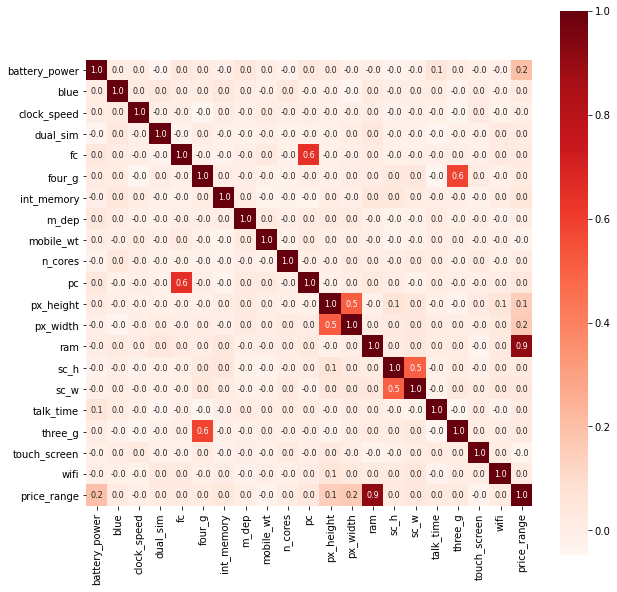

In [21]:
correlation = df.corr()

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar = True, annot = True, fmt = ".1f", annot_kws={'size':8}, square='True', cmap='Reds')

In [6]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [30]:
train = df.drop(['blue','clock_speed', 'pc','fc','m_dep','n_cores', 'sc_h', 'sc_w','talk_time','three_g'],axis = 1)

In [31]:
train.head()

,battery_power,dual_sim,four_g,int_memory,mobile_wt,px_height,px_width,ram,touch_screen,wifi,price_range
0,842,0,0,7,188,20,756,2549,0,1,1
1,1021,1,1,53,136,905,1988,2631,1,0,2
2,563,1,1,41,145,1263,1716,2603,1,0,2
3,615,0,0,10,131,1216,1786,2769,0,0,2
4,1821,0,1,44,141,1208,1212,1411,1,0,1


In [39]:
x = np.array(train.iloc[:,0:11])
y = np.array(train.iloc[:,11:])

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

In [49]:
from sklearn.svm import SVC
sv = SVC(kernel='linear').fit(x_train,y_train)

ValueError: y should be a 1d array, got an array of shape (1600, 0) instead.

In [45]:
model()

TypeError: 'SVC' object is not callable

In [43]:
from sklearn.metrics import accuracy_score
prediction = model.predict(x_test)
accuracy = accuracy_score(y_test, prediction)
print(accuracy)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [37]:
pickle.dump(model,open('mobile_price','wb'))